- Average words per article.
- Average words per sentence. 
- Average word length.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator # Link to documentation http://amueller.github.io/word_cloud/
from PIL import Image
from nltk.corpus import stopwords
from nltk import download
#nltk.download('stopwords')
import imageio

In [9]:
# Load articles of authors
data = pd.read_csv('../Data/Data_clean_csv/clean_dataframe.csv')

with open('../Data/Data_clean_txt/Denisse Dresser.txt', 'r', encoding='utf8') as f:
    dresser_content = f.read()
    
with open('../Data/Data_clean_txt/Enrique Krauze.txt', 'r', encoding='utf8') as f:
    krauze_content = f.read()
    
with open('../Data/Data_clean_txt/John Ackerman.txt', 'r', encoding='utf8') as f:
    ackerman_content = f.read()
    
with open('../Data/Data_clean_txt/Ricardo Raphael.txt', 'r', encoding='utf8') as f:
    raphael_content = f.read()
    
with open('../Data/Data_clean_txt/Valeria Moy.txt', 'r', encoding='utf8') as f:
    moy_content = f.read()

In [ ]:
# Update stopwords in Spanish
spanish_stopwords = stopwords.words('spanish')

additional_words = ['si', 'así', 'sólo', 'tras', 'cómo', 'ello']

for word in additional_words:
    if word not in spanish_stopwords:
        spanish_stopwords.append(word)
        
STOPWORDS.update(spanish_stopwords)
spanish_stopwords[-1]

# Word cloud

In [ ]:
def transform_format(val):
    
    """Changes ceros to number 255"""
    
    if val == 0:
        return 255
    
    else:
        return val

In [90]:
def create_wordcloud(author, path_png_image, image_colors=True):
    
    """Creates a word cloud based on the articles of an author
    - author: accepts "dresser", "krauze", "ackerman", "raphael", or "moy"
    - png_image: uses the contour of the image of the author
    - image_colors: uses the colors of the image of the author"""
    
    # Get author data
    if author == 'dresser':
        author_data = dresser_content
    elif author == 'krauze':
        author_data = krauze_content
    elif author == 'ackerman':
        author_data = ackerman_content
    elif author == 'raphael':
        author_data = raphael_content
    elif author == 'moy':
        author_data = moy_content
    else:
        print('Please write the name of a valid author')
        return
    
    # Import image of mask
    mask = np.array(Image.open(f'{path_png_image}'))
    
    # Transform mask into a new one that will work with the transform_format() function.
    transformed_mask = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)
    for i in range(len(mask)):
        transformed_mask[i] = list(map(transform_format, mask[i]))
    
    # Create and generate WordCloud
    wordcloud = WordCloud(width = 3000, height = 2000, random_state=1,
                      contour_width=3, contour_color='grey',
                      background_color='white', colormap='Blues',
                      collocations=False, stopwords = STOPWORDS, mask=transformed_mask)
    
    wordcloud.generate(author_data)
    
    # Display WordCloud
    plt.figure(figsize=(20, 20))
    
    ### Create coloring from image
    if image_colors == True:
        mask_rgb = imageio.imread('dresser.png', pilmode='RGBA')
        image_colors = ImageColorGenerator(mask_rgb)
        wordcloud.recolor(color_func=image_colors)
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
        
    else:
        plt.imshow(wordcloud ,interpolation="bilinear")
      
    plt.axis("off")
    plt.show()

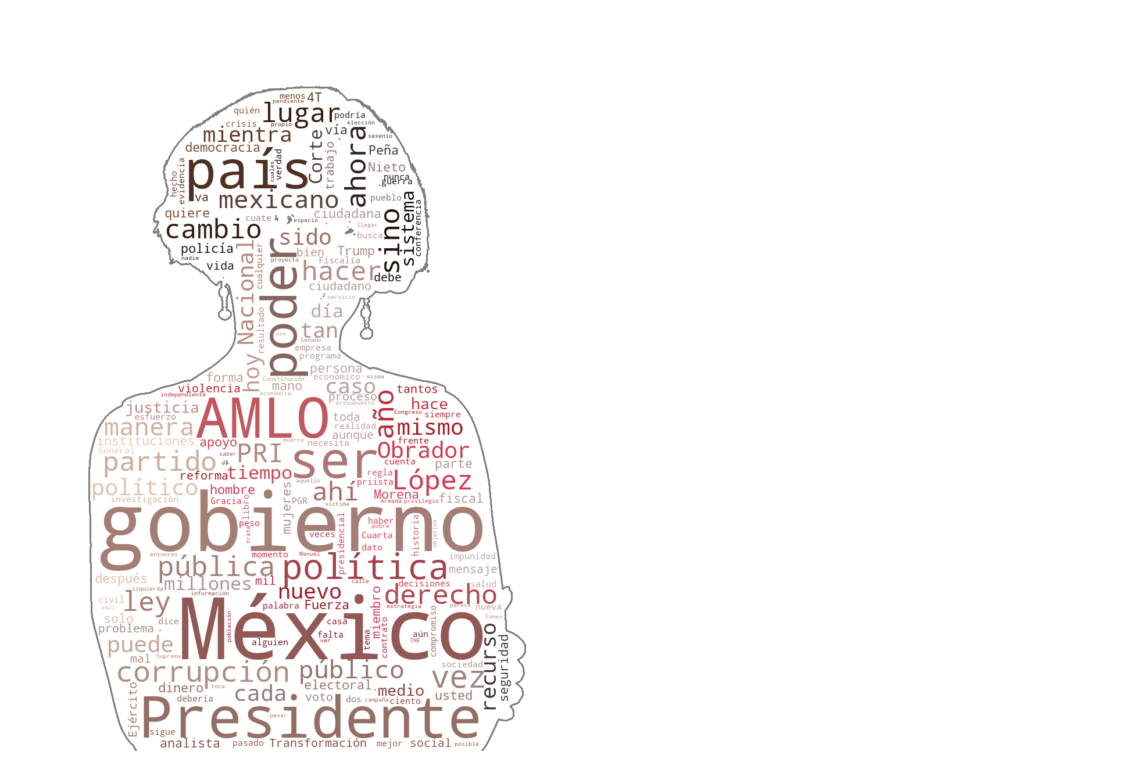

In [91]:
create_wordcloud('dresser', 'dresser.png', image_colors=True)

In [87]:
create_wordcloud('moy', 'moy.png', image_colors=False)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

# Clarity